## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### <span style="color:red"> H(x) = aX + b 에서처럼, F = C*1.8 +32  </span>
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
<u><span style="color:red">[Chain Rule 증명](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1b/a/proving-the-chain-rule) </span></u>

선형회귀는 쉽게 접근하면 쉽고, 어렵게 접근하면 매우 어려운 모델이다\
이 부분은 결국 2가지가 정의되어야 하는데,\
(1) 가장 기본적인 수식 Hypothesis Function\
(2) Cost Function\
(3) Learning rate\
Cost는 비용인데 Learning(학습)을 언제 멈출지를 결정하는 요인이 된다.\
비용이 적게 드는것이 좋고, 비용이 안들면 Best\
머신, 딥러닝에서도 학습을 하면서 모델이 멈춰야 하는 시점을 알야 하는데\
비용이 없을 때(0) 멈춰야 한다.\
이 수식이 바로 MSE Cost Function
Cost함수를 이용해서 그래프 선상에서 어느 위치에 현재 있는지는 알 수 있다.\
그런데 그래프 선상에서 내려갈지/올라갈지 어느 쪽으로 이동할지는 알 수 없다.\
그래서 미분이 필요하다. (경사하강)\
Learning rate\
학습 속도와 관련있는 하이퍼파라미터\
하이퍼파라미터 튜닝한다라고 하면\
learning rate가 높으면 발산 (Overfittiong)\
learning rate가 낮으면 학습속도가 매우 느려진다.\
0.01~0.004 사이의 값을 권장한다.

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!')

### Generate Dataset

####  <span style="color:blue">선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성</span>
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [3]:
'''
섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
C의 첫 10개 값을 확인합니다. 
'''
np.random.seed(0)
C = np.random.randint(0,100,100)
print(C.shape)
C_ls = C[:10]

(100,)


In [4]:
C_ls

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### <span style="color:blue">우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성.</span> 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

### Bias (편향 찾기) -- Weight는 1.8

####  <span style="color:blue">Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.</span>

In [5]:
F = C*1.8 + 32

In [6]:
print(F.shape)
print(F[:10])

(100,)
[111.2 116.6 147.2 152.6 152.6  48.2 181.4  69.8  96.8 188.6]


### Visualization
위에서 만든 섭씨, 화씨 온도를 Feature, Label이 되도록 그려본다.

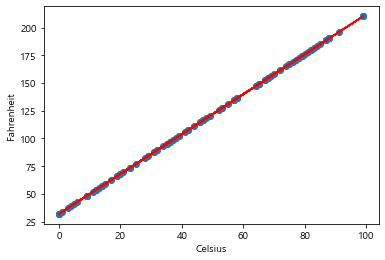

In [7]:
plt.scatter(C, F)
plt.plot(C, F, 'r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

#### Bias(편향) 찾기 - weight는 1.8로 지정

In [8]:
# 먼저 앞서 생성한 섭씨온도 X, 화씨온도 y 변수에 할당
X = C
y = F # 화씨온도가 라벨이기 때문에 ... 1차원으로밖에 나올 수 없다.

In [9]:
w = 1.8
# b 값은 랜덤하게 지정하자. 학습이 용이하게 될 수 있는 값으로..
b = np.random.uniform(low=-1.0, high=1.0)

print(w,b)

1.8 -0.7236340973027724


In [10]:
# 위에서 지정한 w(1.8), b(랜덤한 값)를 가지고 가설을 하나 세우자.
y_predict = X*w + b
print(y_predict[:10])

[ 78.4763659  83.8763659 114.4763659 119.8763659 119.8763659  15.4763659
 148.6763659  37.0763659  64.0763659 155.8763659]


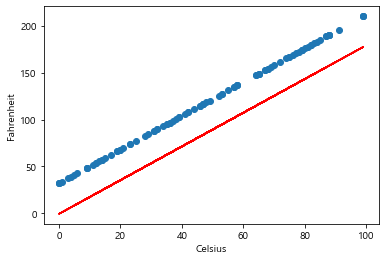

In [11]:
plt.scatter(C, F)
plt.plot(X, y_predict, 'r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [12]:
# (y_predict - y) 다시 말해서 오차
# 오차만큼 다시 bias에 보정을 해주면 된다.
b = (b - (y_predict-y)).mean()
b

32.0

In [13]:
y_predict = w*X+b
y_predict[:10]

array([111.2, 116.6, 147.2, 152.6, 152.6,  48.2, 181.4,  69.8,  96.8,
       188.6])

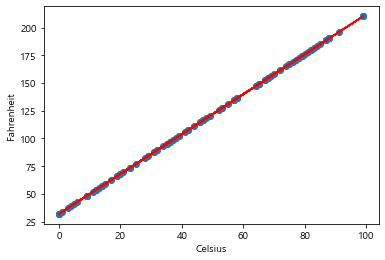

In [14]:
plt.scatter(C, F)
plt.plot(X, y_predict, 'r')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [15]:
sum((y_predict - y)**2)/100

0.0

### w, b 모두 랜덤한 값으로 지정하기

In [16]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)
w, b

(-0.606835276639893, -0.2625496586780718)

In [17]:
y_predict = w*X + b
y_predict[:10]

array([-26.96330183, -28.78380766, -39.10000736, -40.92051319,
       -40.92051319,  -5.72406715, -50.62987762, -13.00609047,
       -22.10861962, -53.05721873])

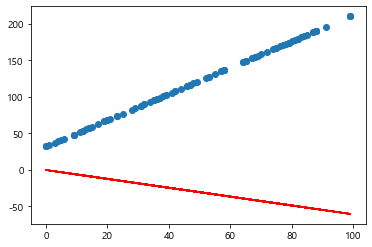

In [18]:
plt.scatter(C,F)
plt.plot(X, y_predict, 'r')

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
####  <span style="color:red">이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.</span>
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [26]:
num_epoch = 1000000 # epoch : 한번 학습을 몇번 반복할지를 정하는 것(즉, 몇번의 for문을 돌릴지를 세팅한다.)
learning_rate = 0.0003

w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)
change_ls = []

for epoch in range(num_epoch) :
    y_predict = w*X+b
    
    error = np.abs(y_predict-y).mean()
    if error < 0.0001 :
        break
    
    w = w - learning_rate * ((y_predict - y) * X).mean()
    b = b - learning_rate * (y_predict - y).mean()
    change_ls.append((w, b))
    
    # 10000회마다 epoch, b, w error(cost)를 출력해서 확인..
    if epoch % 10000 == 0 :
        print(f'epoch : {epoch:5}, w : {w:.6f}, b : {b:.6f}, error : {error:.6f}')
        
print('*'*100)
print(f'epoch : {epoch:5}, w : {w:.6f}, b : {b:.6f}, error : {error:.6f}')

epoch :     0, w : 2.133056, b : -0.717450, error : 140.524047
epoch : 10000, w : 2.035026, b : 16.782469, error : 6.364875
epoch : 20000, w : 1.909324, b : 24.921451, error : 2.960670
epoch : 30000, w : 1.850853, b : 28.707360, error : 1.377178
epoch : 40000, w : 1.823655, b : 30.468404, error : 0.640605
epoch : 50000, w : 1.811003, b : 31.287566, error : 0.297982
epoch : 60000, w : 1.805118, b : 31.668606, error : 0.138609
epoch : 70000, w : 1.802381, b : 31.845850, error : 0.064475
epoch : 80000, w : 1.801107, b : 31.928296, error : 0.029991
epoch : 90000, w : 1.800515, b : 31.966646, error : 0.013951
epoch : 100000, w : 1.800240, b : 31.984485, error : 0.006489
epoch : 110000, w : 1.800111, b : 31.992783, error : 0.003018
epoch : 120000, w : 1.800052, b : 31.996643, error : 0.001404
epoch : 130000, w : 1.800024, b : 31.998438, error : 0.000653
epoch : 140000, w : 1.800011, b : 31.999274, error : 0.000304
epoch : 150000, w : 1.800005, b : 31.999662, error : 0.000141
****************

### Predict

In [27]:
y_predict = w*C + b
y_predict[:5]

array([111.19992338, 116.59993446, 147.19999724, 152.60000831,
       152.60000831])

#### <span style="color:blue">선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.</span>

### DataFrame Visualization

In [29]:
result = pd.DataFrame({'C' : C, 'F' : F, 'F(predict)' : y_predict})
result.head(10)

,C,F,F(predict)
0,44,111.2,111.199923
1,47,116.6,116.599934
2,64,147.2,147.199997
3,67,152.6,152.600008
4,67,152.6,152.600008
5,9,48.2,48.199794
6,83,181.4,181.400067
7,21,69.8,69.799838
8,36,96.8,96.799894
9,87,188.6,188.600082


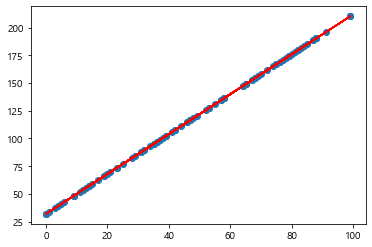

In [30]:
plt.scatter(C,F)
plt.plot(C, y_predict, 'r')
plt.show()